In [49]:
# https://github.com/ardhiraka/PFDS_sources/blob/master/diabetes.csv
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

labels = ["pregnant","glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age","label"]
diabetesDF = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", names = labels, header=1)
diabetesDF.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  767 non-null    int64  
 1   glucose   767 non-null    int64  
 2   bp        767 non-null    int64  
 3   skin      767 non-null    int64  
 4   insulin   767 non-null    int64  
 5   bmi       767 non-null    float64
 6   pedigree  767 non-null    float64
 7   age       767 non-null    int64  
 8   label     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#  pastikan data kira numerik 
for lab in labels: 
    diabetesDF[lab] = pd.to_numeric(diabetesDF[lab])

In [10]:
diabetesDF.dropna(inplace=True)

In [11]:
diabetesDF

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [12]:
feature_col = ["pregnant","glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age"]
independen = diabetesDF[feature_col]
dependen = diabetesDF.label

In [41]:
X_train,X_test, Y_train, Y_test = train_test_split(independen, dependen, test_size=0.3, random_state= 42 )

In [42]:
model = DecisionTreeClassifier()

trained_model  = model.fit(X_train, Y_train)

In [43]:
y_pred = trained_model.predict(X_test)

In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [45]:
metrics.accuracy_score(y_pred, Y_test)

0.7316017316017316

In [47]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

In [51]:
dot_data = StringIO()

tree.export_graphviz(trained_model,out_file=dot_data, class_names=["0","1"], feature_names=feature_col, filled=True )

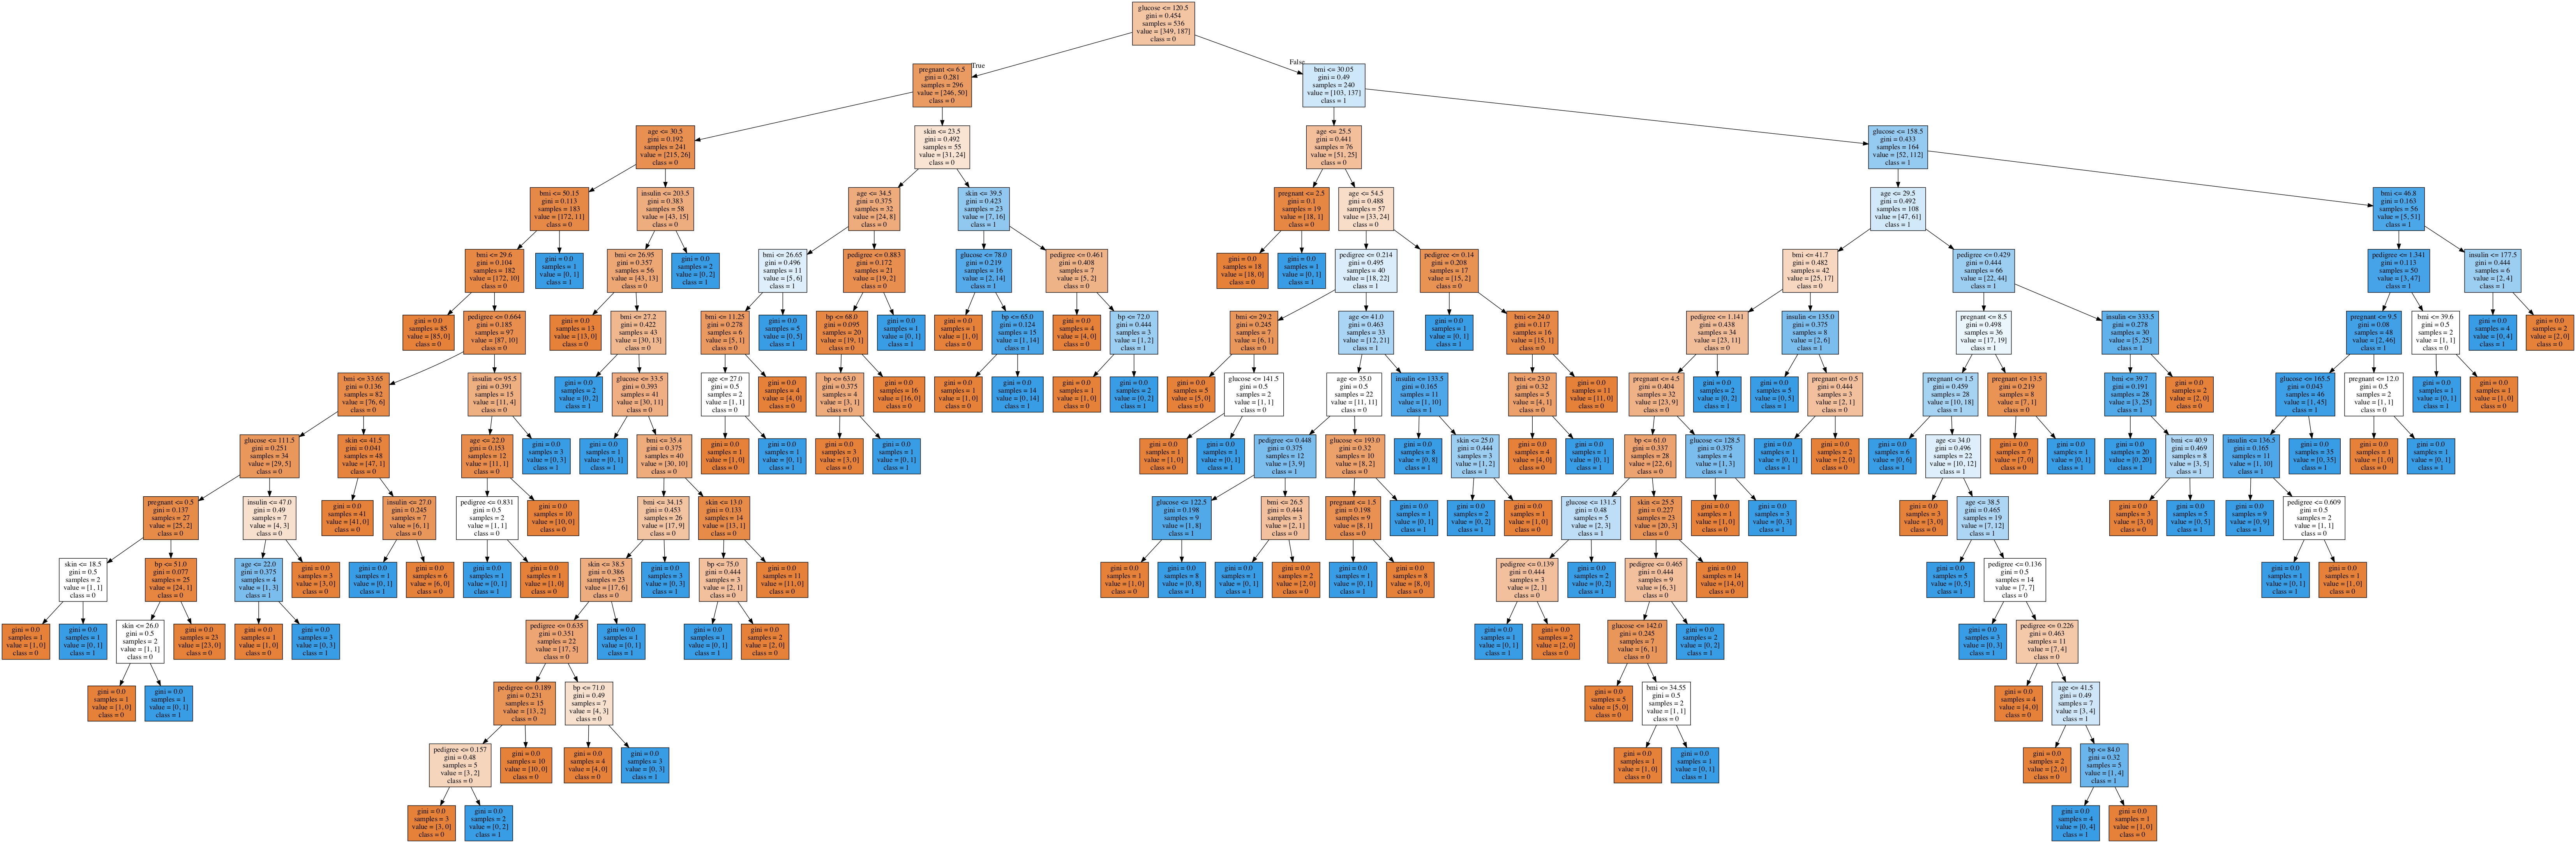

In [53]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [88]:
model_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_opt = model_opt.fit(X_train, Y_train)
modelOpt_y_pred= model_opt.predict(X_test)
metrics.accuracy_score(modelOpt_y_pred, Y_test)

0.70995670995671

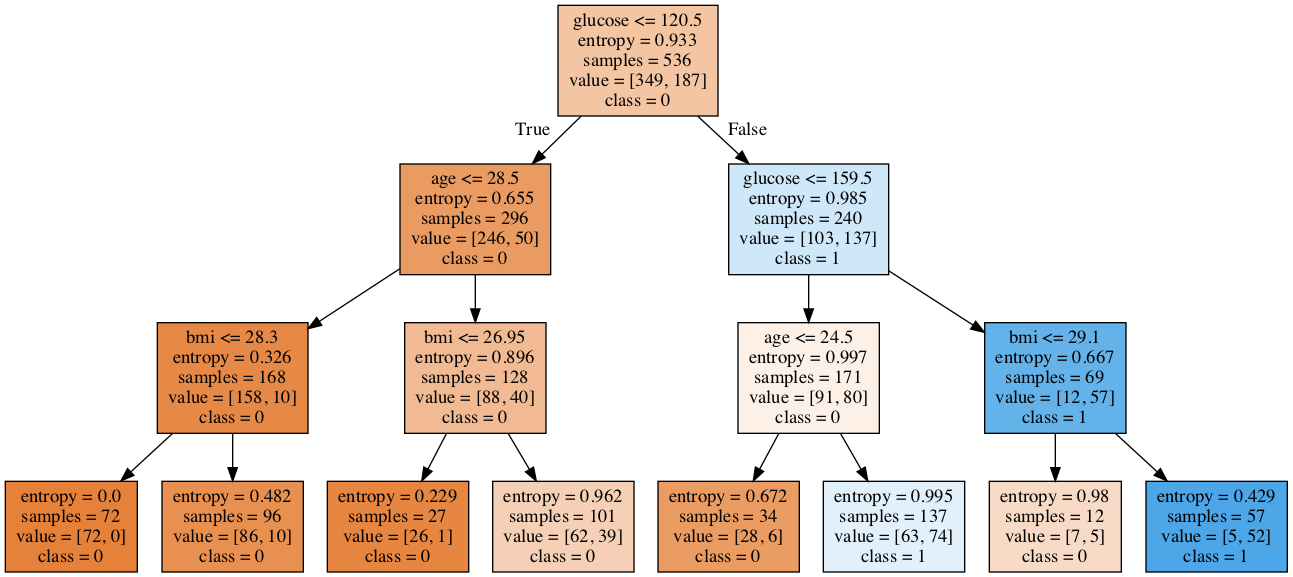

In [90]:
dot_data_opt = StringIO()

tree.export_graphviz(model_opt,out_file=dot_data_opt, class_names=["0","1"], feature_names=feature_col, filled=True )
graph = pydotplus.graph_from_dot_data(dot_data_opt.getvalue())
Image(graph.create_png())